In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#โหลดฟังก์ชั่นที่เราเขียนไว้
from getData import *
import os


#get current path
cwd = os.getcwd()

#set data path
path = cwd+'/Data/egdata' # you can use your path
#download dataframe allStocks.csv
allStocks = pd.read_csv(path+'/allStocks.CSV')

In [14]:
stocklist = ['SET', 'JAS', 'TMB']
df = pd.DataFrame()
for i in range(0,len(stocklist)):
    stock = getStock(stocklist[i], allStocks)
    df[i] = stock['Close']

df.columns = stocklist
df.dropna(inplace=True)

df = df['2012':'2017']

#normalization
dfNorm = (df/df.iloc[0]) *100
dfNorm.columns = stocklist

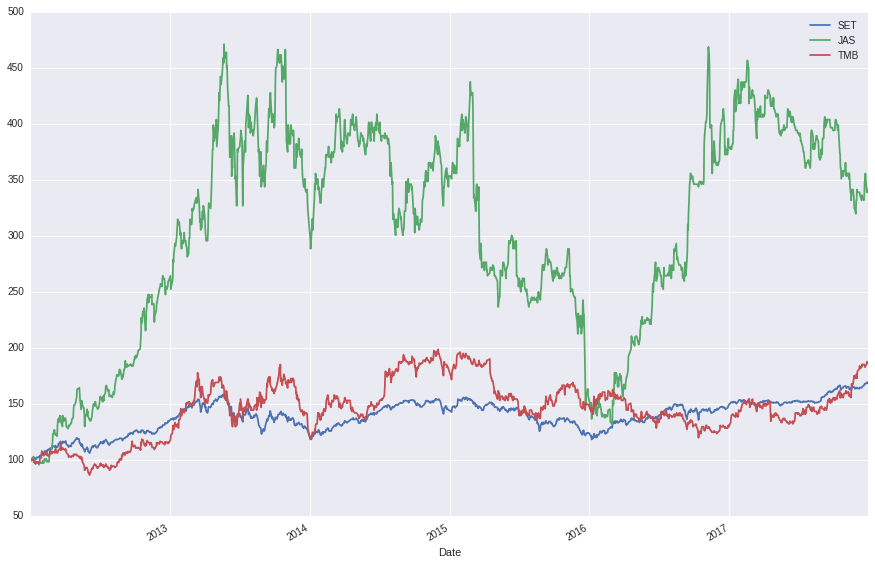

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)

dfNorm.plot()

beta equation

<img src="Pics/beta.png">

In [16]:
from scipy import stats
import statsmodels.api as sm 

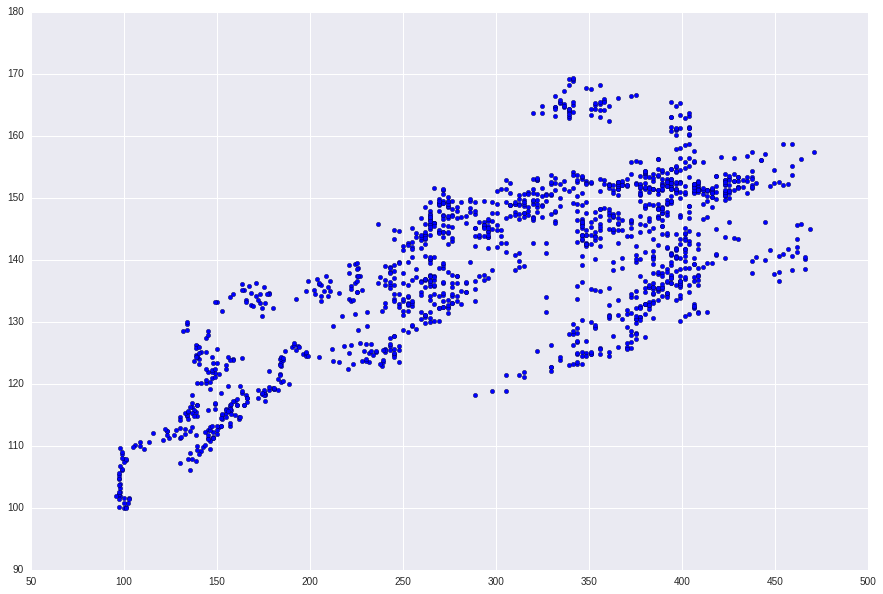

In [32]:
X = dfNorm['JAS']
Y = dfNorm['SET']
plt.scatter(X,Y)
plt.show()

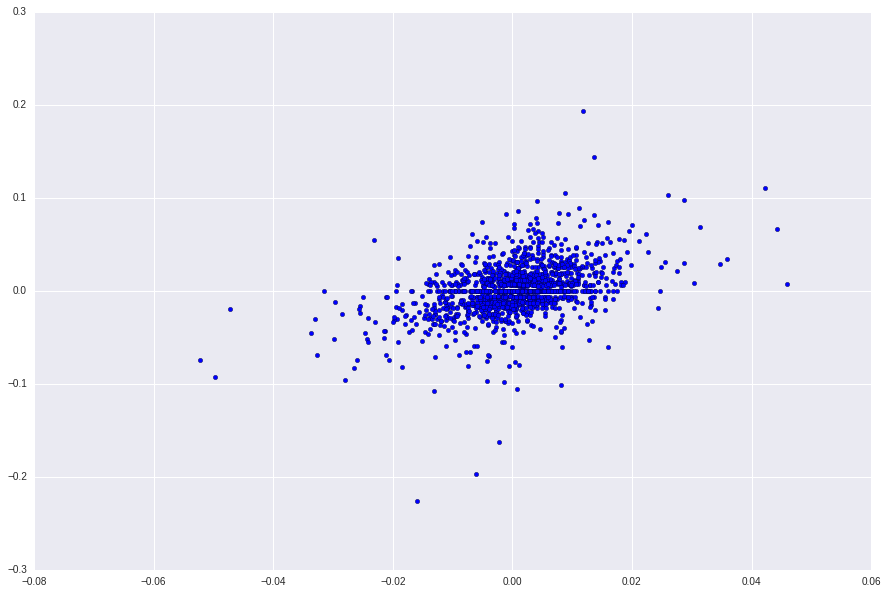

In [33]:
X = dfNorm['SET'].pct_change().dropna()
Y = dfNorm['JAS'].pct_change().dropna()
plt.scatter(X,Y)
plt.show()

In [34]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit() #Ordinary Least Squares regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    JAS   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     356.3
Date:                Tue, 31 Jul 2018   Prob (F-statistic):           2.73e-71
Time:                        21:00:10   Log-Likelihood:                 3314.9
No. Observations:                1463   AIC:                            -6626.
Df Residuals:                    1461   BIC:                            -6615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      1.035      0.301      -0.001       0.002
SET            1.3891      0.074     18.876      0.000       1.245       1.533
==============================================================================
Omnibus:                      305.713   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5313.547
Skew:                          -0.475   Prob(JB):                         0.00
Kurtosis:                      12.288   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
stat = stats.linregress(X,Y)
stat

LinregressResult(slope=1.3890928438442105, intercept=0.000680553300192056, rvalue=0.44279029301007605, pvalue=2.733511728369052e-71, stderr=0.07359003628853139)

In [36]:
beta = stat[0]#slope
beta

1.3890928438442105

verify

In [37]:
cov = np.cov(Y,X)
cov[0,1]

0.00011071578445808681

In [38]:
X.var()

7.970366052112767e-05

In [39]:
cov[0,1]/X.var()

1.3890928438442112

# how about TMB

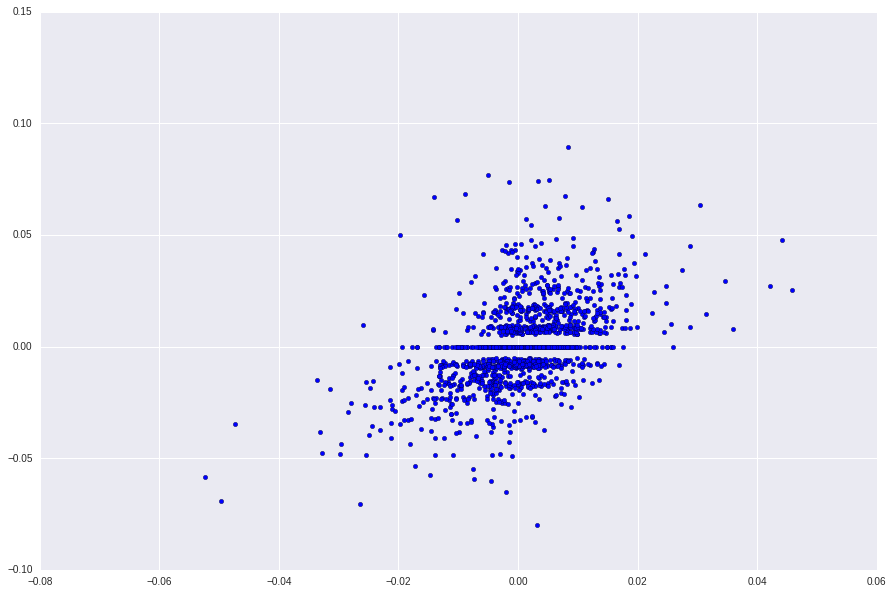

In [25]:
X = dfNorm['SET'].pct_change().dropna()
Y = dfNorm['TMB'].pct_change().dropna()
plt.scatter(X,Y)
plt.show()

In [26]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit() #Ordinary Least Squares regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TMB   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     509.3
Date:                Tue, 31 Jul 2018   Prob (F-statistic):           5.46e-97
Time:                        20:56:35   Log-Likelihood:                 3962.1
No. Observations:                1463   AIC:                            -7920.
Df Residuals:                    1461   BIC:                            -7910.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.412      0.680      -0.001       0.001
SET            1.0670      0.047     22.567      0.000       0.974       1.160
==============================================================================
Omnibus:                      247.372   Durbin-Watson:                   2.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.360
Skew:                           0.764   Prob(JB):                    4.40e-217
Kurtosis:                       6.743   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
stat = stats.linregress(X,Y)
beta = stat[0]#slope
beta

1.067004668254353

In [31]:
cov = np.cov(Y,X)
cov[0,1]/X.var()

1.0670046682543537